# About the data
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.
# Problem Statement
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing numerous passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. 
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. 
In this, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<img src = "https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg" alt="Drawing" width="400">
<figcaption> <h6> Titanic : The most incredible thing that Collide with destiny.</h6>
<b> Definition Key </b>

|S.No.|Variable|Definition|Key       |
|-----|--------|----------|----------|
|1    |survival|Survival  |<ul><li>0=No</li><li>1=Yes</li></ul>|
|2    |Pclass  |Ticket Class  |<ul><li>1st Class</li><li>2nd Class</li><li>3rd Class</li></ul>|
|3    |Sex     |Sex  |<ul><li>Female</li><li>Male</li></ul>|
|4    |Age     |Age in years|-|
|5    |Sibsp   |# of siblings / spouses aboard the Titanic|-|
|6    |Parch   |# of parents / children aboard the Titanic|-|
|7    |Ticket  |Ticket number|-|
|8    |Fare    |Passenger fare|-|
|9    |Cabin   |Cabin Number|-|
|10   |embarked|Port of Embarkation|<ul><li>C = Cherbourg</li><li>Q = Queenstown</li><li>S =Southampton</li></ul>|

#### Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np

#Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling libraries
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.simplefilter("ignore")
%matplotlib inline
plt.style.use('ggplot')

C:\Users\lenovo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lenovo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<b> Loading Data </b>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<b> Checking for Shape </b>

In [5]:
print("Shape of the train dataset is {} rows and {} columns".format(*train.shape))
print("Shape of the test dataset is {} rows and {} columns".format(*test.shape))

Shape of the train dataset is 891 rows and 12 columns
Shape of the test dataset is 418 rows and 11 columns


<b> Checking for Missing Values </b>

In [6]:
# Missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]))   
        print("There are " + str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
        return mis_val_table_ren_columns

In [7]:
missing_values_table(train).style.background_gradient(cmap='Wistia')

Your selected dataframe has 12
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.100000
Age,177,19.900000
Embarked,2,0.200000


In [8]:
missing_values_table(test).style.background_gradient(cmap='Wistia')

Your selected dataframe has 11
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.200000
Age,86,20.600000
Fare,1,0.200000


<b> Dropping for duplicated values if any </b>

In [9]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)
print("Shape of the train dataset is {} rows and {} columns".format(*train.shape))
print("Shape of the test dataset is {} rows and {} columns".format(*test.shape))

Shape of the train dataset is 891 rows and 12 columns
Shape of the test dataset is 418 rows and 11 columns


<b> Dropping the ID column </b>

In [10]:
train.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

<b> Plotting the missing values </b>

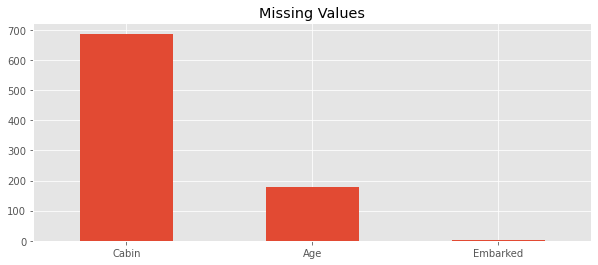

In [11]:
def cal_missing(train):
    missing = train.isna().sum().sort_values(ascending=False)
    missing = missing[missing!=0]
    missing_perc = missing / train.shape[0]*100
    return missing, missing_perc

if train.isna().any().sum()>0:
    missing, missing_perc = cal_missing(train)
    missing.plot(kind='bar', figsize=(10,4))
    plt.title("Missing Values")
    plt.xticks(rotation = 360)
    plt.show()
else:
    print("No Missing Values")

<b> Checking for basic information about dataset </b>

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [13]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis

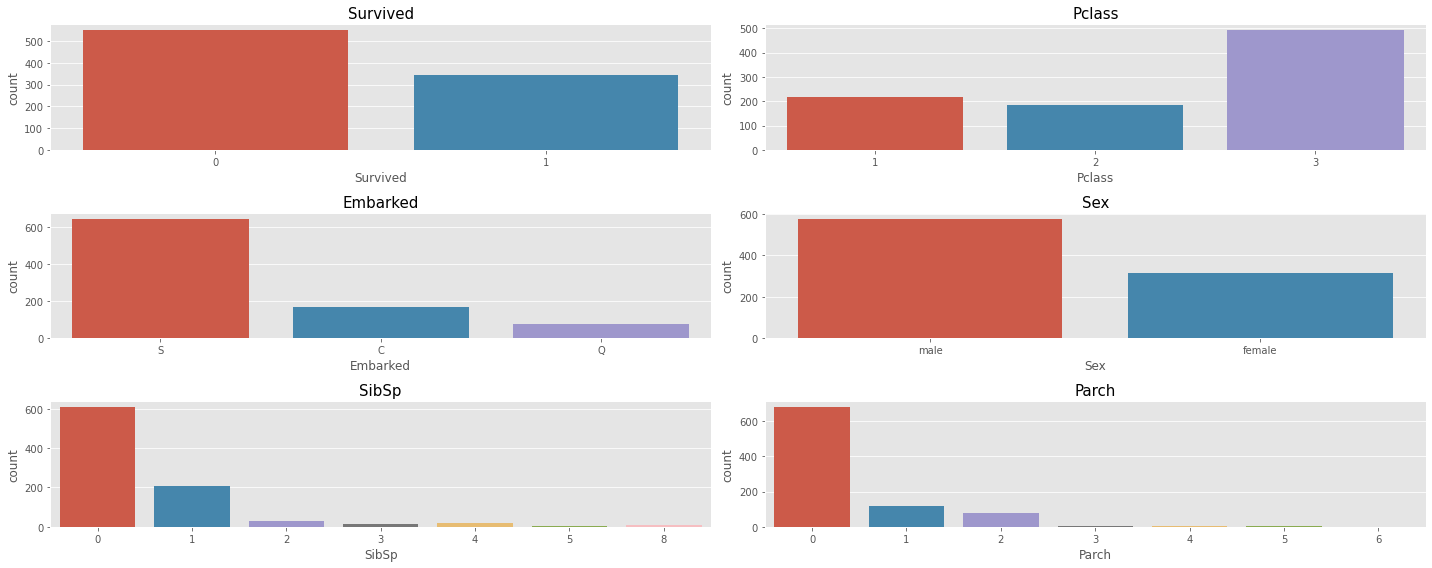

In [14]:
list = ['Survived', 'Pclass', 'Embarked', 'Sex', 'SibSp', 'Parch']
j = 1
plt.figure(figsize=(20,8))
for item in list:
    plt.subplot(3,2,j)
    sns.countplot(x = item,data = train, dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

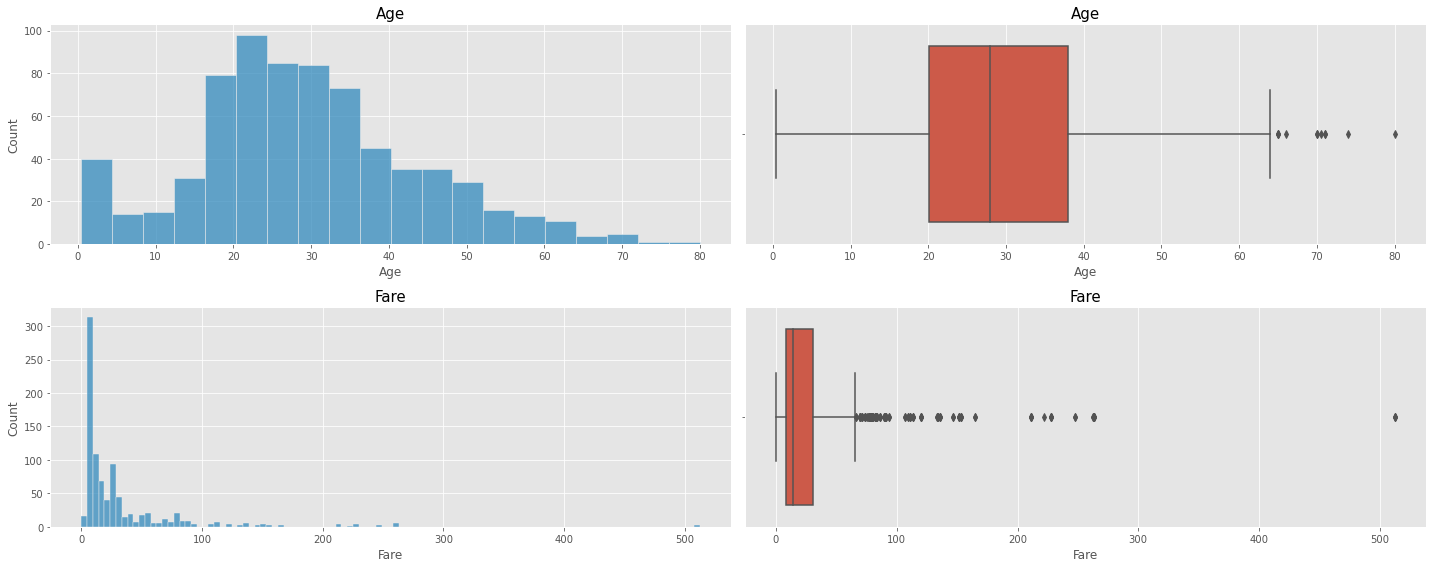

In [15]:
list = ['Age', 'Fare']
j = 1
plt.figure(figsize=(20,8))
for item in list:
    plt.subplot(2,2,j)
    sns.histplot(train[item])
    plt.title(item, fontsize=15)
    j = j+1
    plt.subplot(2,2,j)
    sns.boxplot(train[item])
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

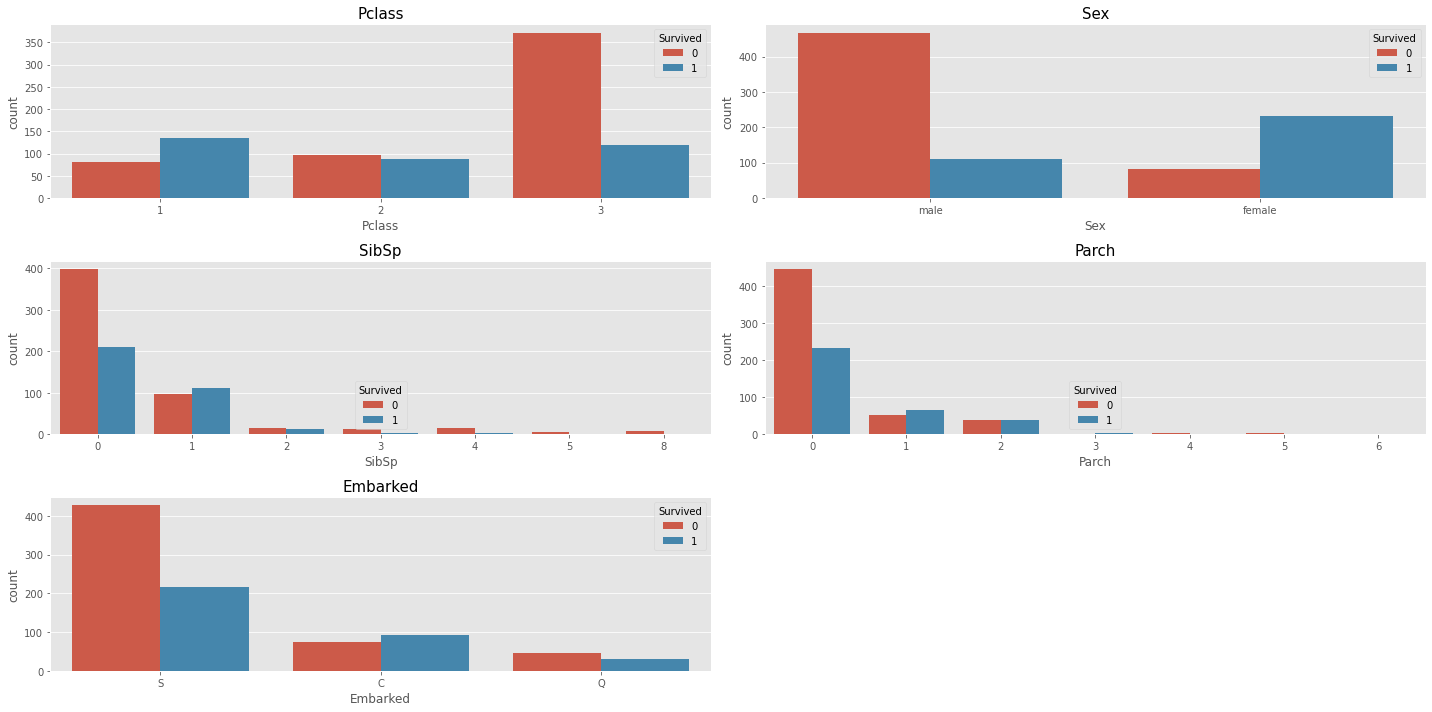

In [16]:
l = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
j = 1
plt.figure(figsize=(20,10))
for item in l:
    plt.subplot(3,2,j)
    sns.countplot(x = item, hue= "Survived", data = train, dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

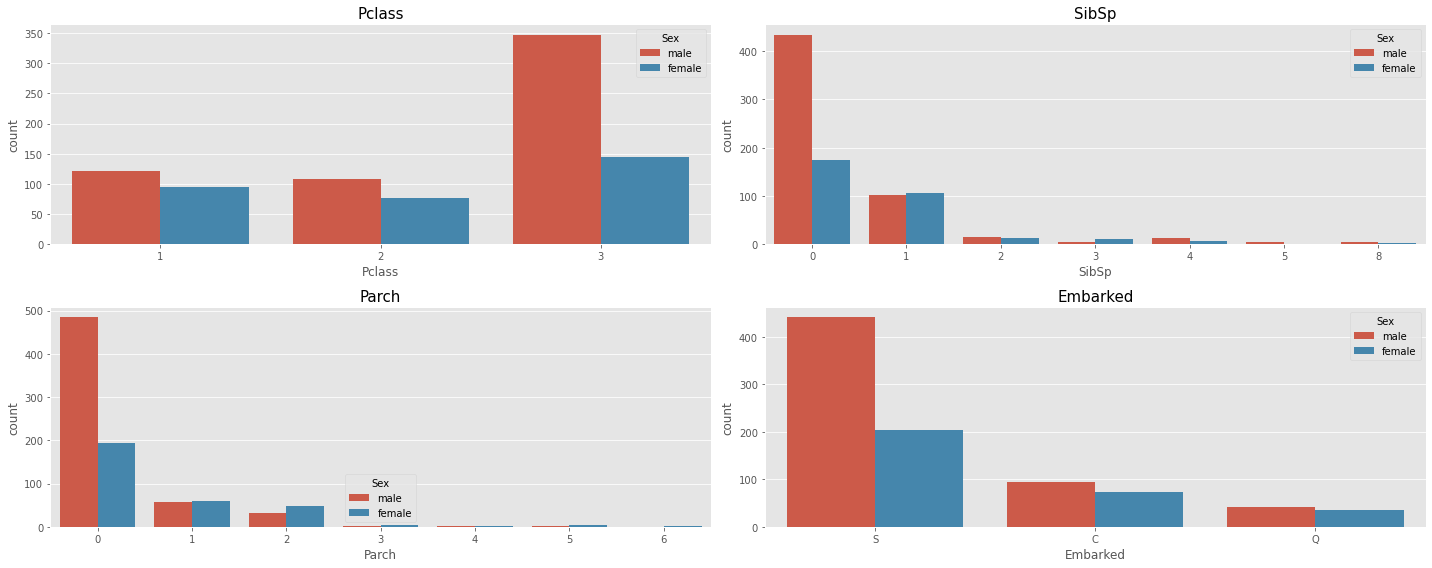

In [17]:
l = ['Pclass', 'SibSp', 'Parch', 'Embarked']
j = 1
plt.figure(figsize=(20,8))
for item in l:
    plt.subplot(2,2,j)
    sns.countplot(x = item, hue= "Sex", data = train, dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

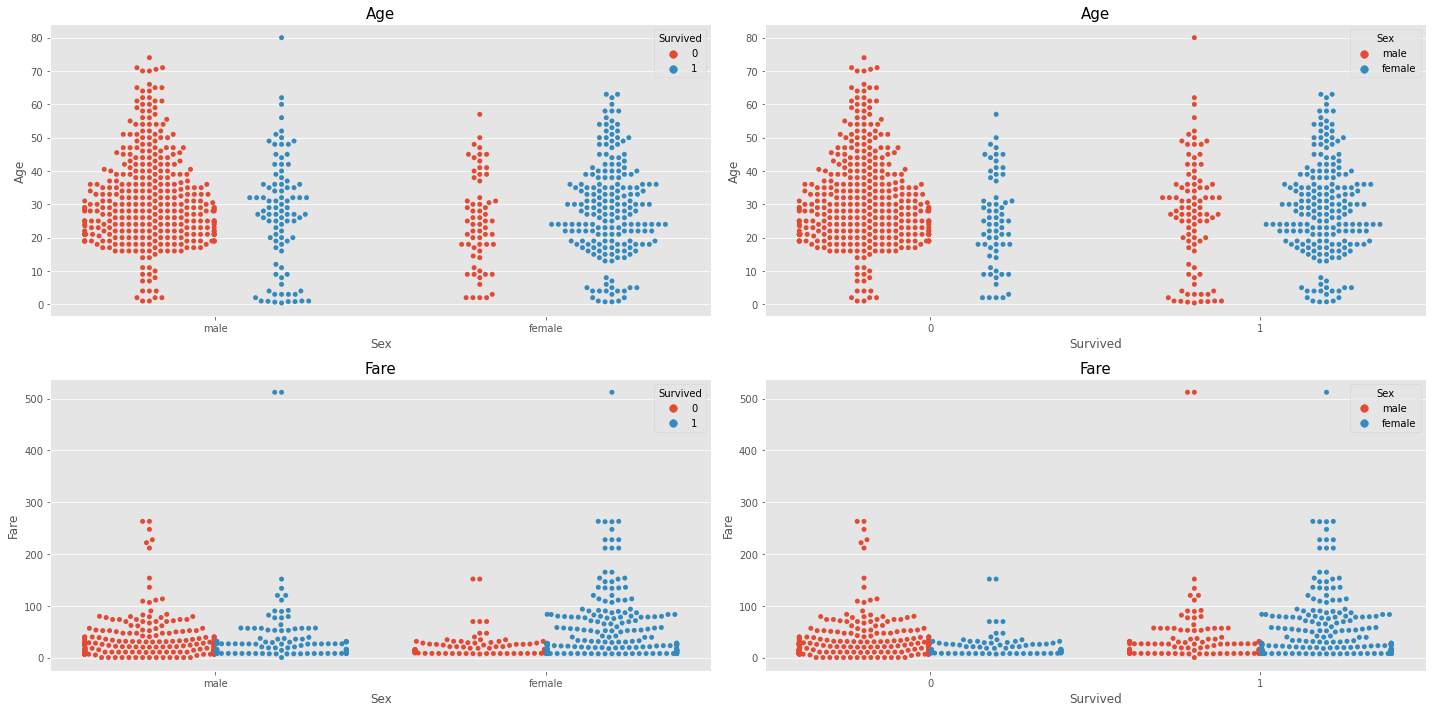

In [18]:
list = ['Age', 'Fare']
j = 1
plt.figure(figsize=(20,10))
for item in list:
    plt.subplot(2,2,j)
    sns.swarmplot(train['Sex'],train[item], hue= train['Survived'], dodge = True)
    plt.title(item, fontsize=15)
    plt.legend
    j = j+1
    plt.subplot(2,2,j)
    sns.swarmplot(y = train[item], x = train['Survived'], hue= train['Sex'], dodge = True)
    plt.title(item, fontsize=15)
    plt.legend
    j = j+1
plt.tight_layout()

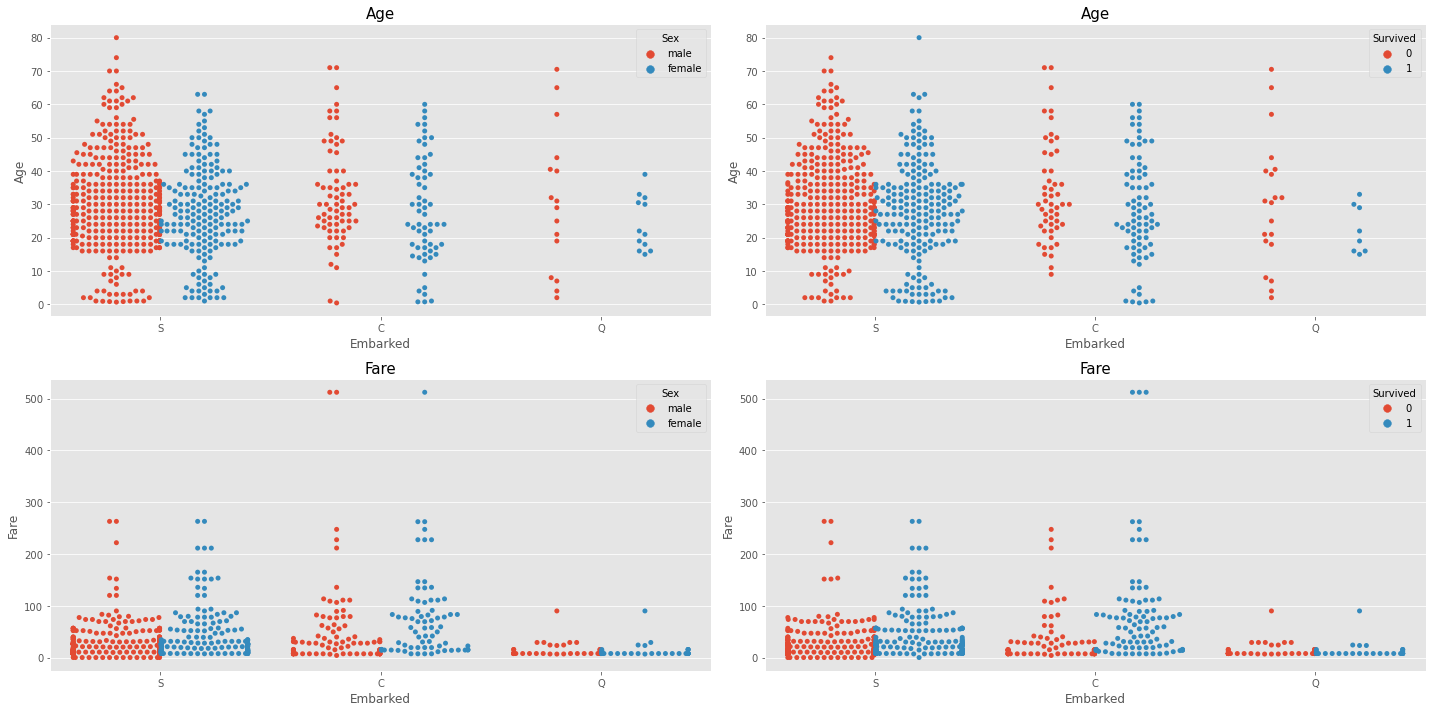

In [19]:
list = ['Age', 'Fare']
j = 1
plt.figure(figsize=(20,10))
for item in list:
    plt.subplot(2,2,j)
    sns.swarmplot(y = train[item], x = train['Embarked'], hue= train['Sex'], dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
    plt.subplot(2,2,j)
    sns.swarmplot(y = train[item], x = train['Embarked'], hue= train['Survived'], dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

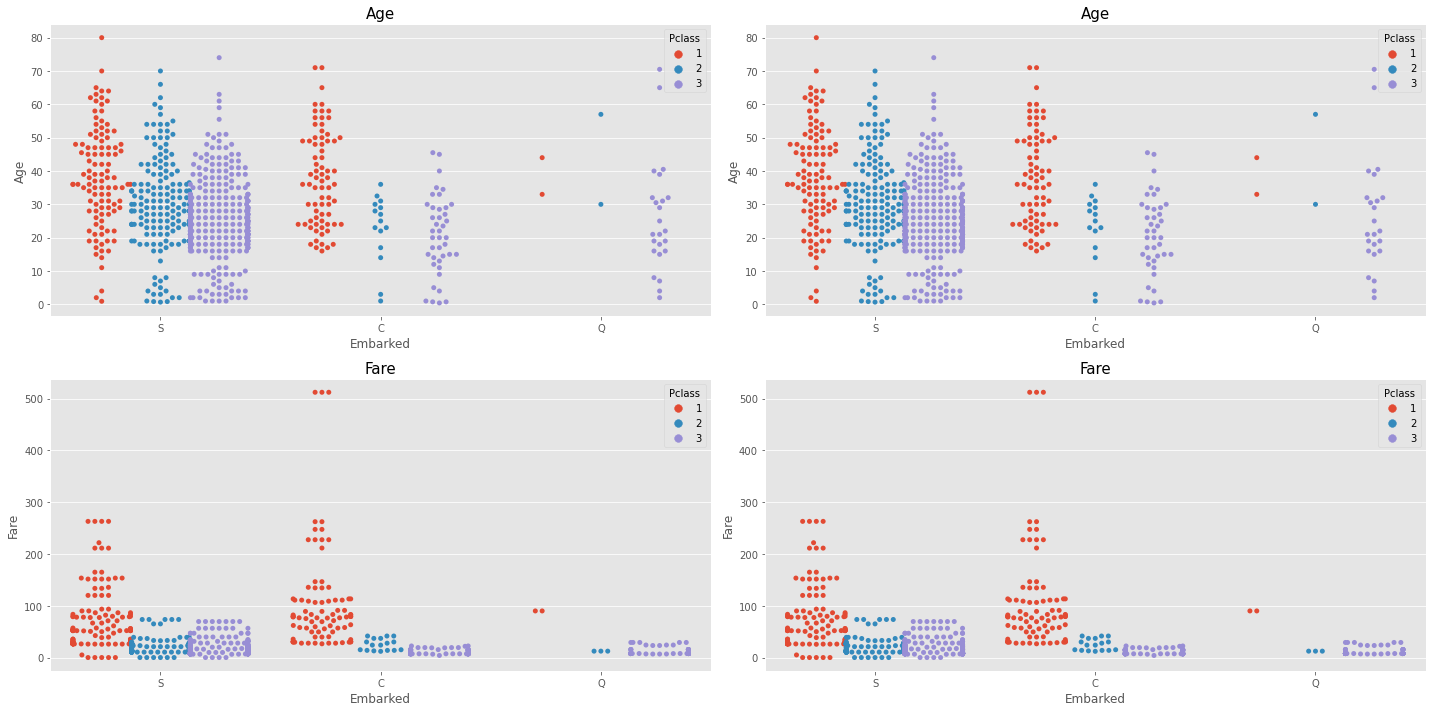

In [20]:
list = ['Age', 'Fare']
j = 1
plt.figure(figsize=(20,10))
for item in list:
    plt.subplot(2,2,j)
    sns.swarmplot(y = train[item], x = train['Embarked'], hue= train['Pclass'], dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
    plt.subplot(2,2,j)
    sns.swarmplot(y = train[item], x = train['Embarked'], hue= train['Pclass'], dodge = True)
    plt.title(item, fontsize=15)
    j = j+1
plt.tight_layout()

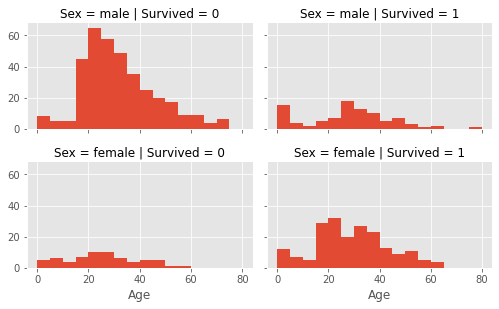

In [21]:
bins = np.arange(0, 85, 5)
g = sns.FacetGrid(train, col='Survived', row = 'Sex', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=bins)

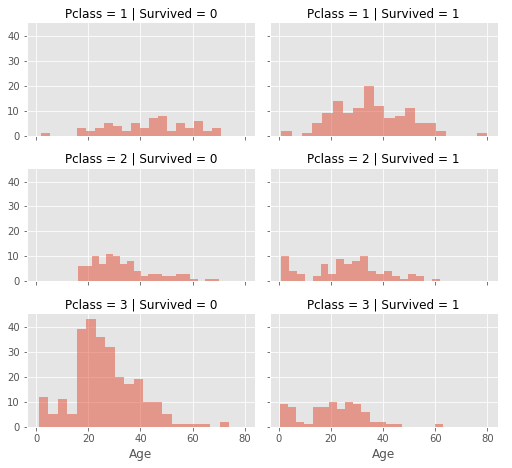

In [22]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

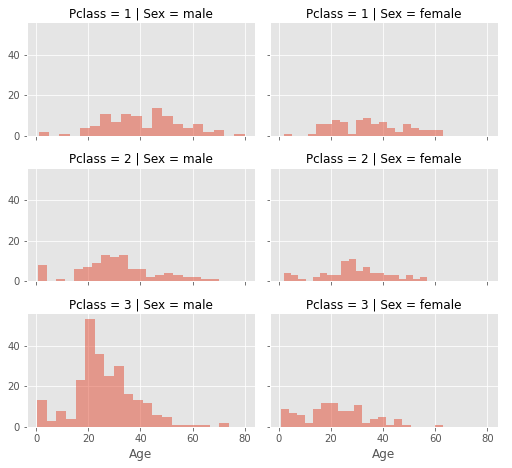

In [23]:
grid = sns.FacetGrid(train, col='Sex', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<b> Correlation Plot </b>

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

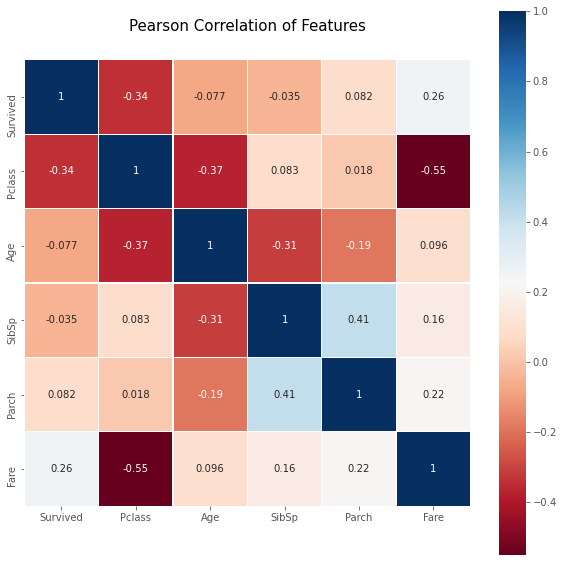

In [24]:
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

<b> Pairplot </b>

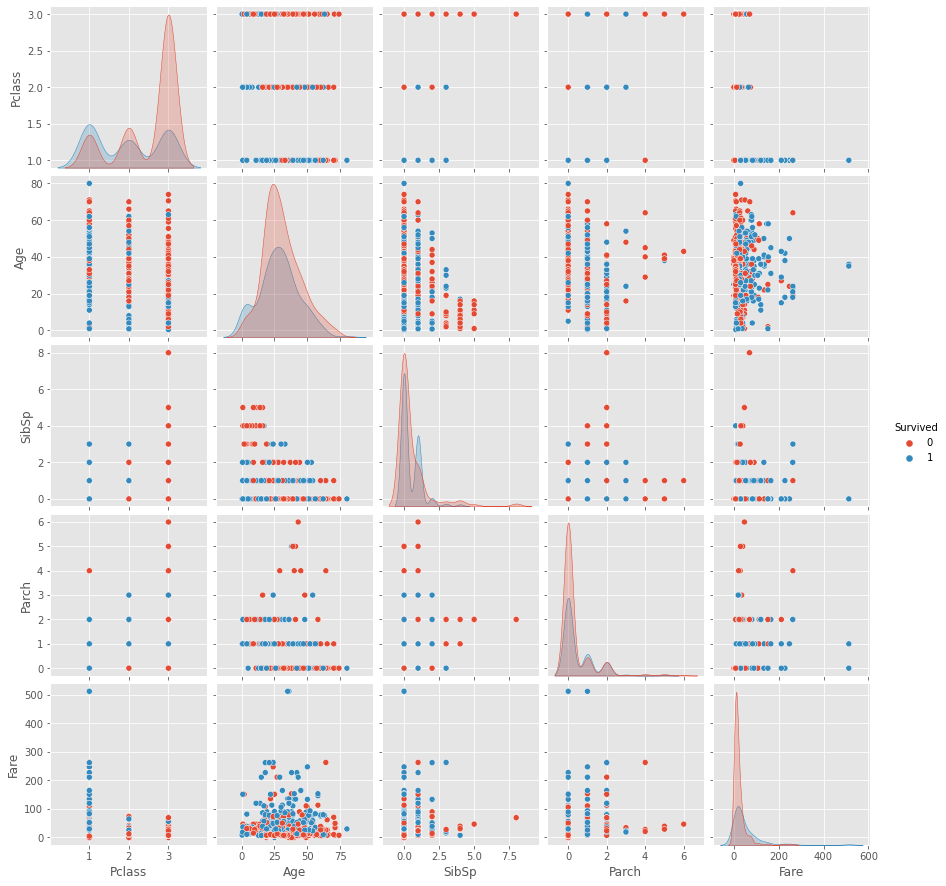

In [25]:
sns.pairplot(train, hue = 'Survived')

<b> Categorical Plot </b>

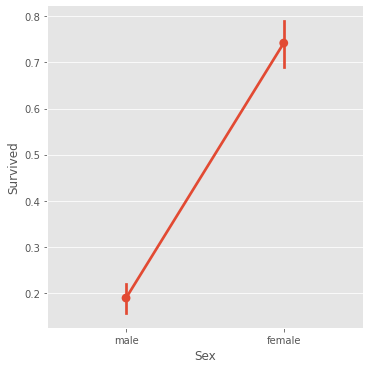

In [36]:
sns.catplot(x = 'Sex', y = 'Survived', data = train, kind = 'point')

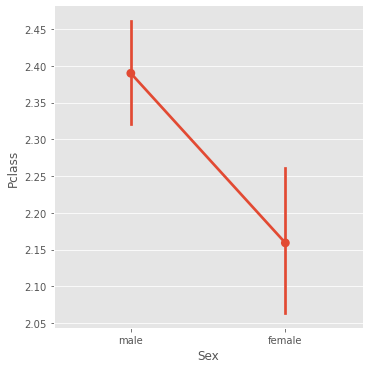

In [40]:
sns.catplot(x = 'Sex', y = 'Pclass', data = train, kind = 'point')

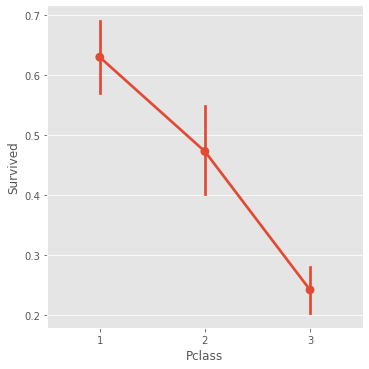

In [42]:
sns.catplot(x = 'Pclass', y = 'Survived', data = train, kind = 'point')

<b> Missing Value Imputation </b>

In [48]:
age_groupby_train = train.groupby(['Sex','Embarked','Pclass'])['Age'].mean()

- Since we do not have any survive column in test dataset hence, we hasn't use this column to calculate the mean age value.

In [49]:
train['Age'].fillna(value = -1,inplace =True)

In [50]:
for row in range(len(age_groupby_train.index)):
    train.loc[(train['Sex']== age_groupby_train.index[row][0]) &
           (train['Embarked']== age_groupby_train.index[row][1])&
           (train['Pclass']== age_groupby_train.index[row][2])&
           (train['Age']==-1),'Age']=age_groupby_train.values[row]

In [51]:
train['Embarked'] = train['Embarked'].replace(np.nan, train['Embarked'].mode()[0])

- Since the missing value number in Cabin column in nearly 80% of the data hence, we will drop this column.

In [52]:
test['Age'].fillna(value = -1,inplace =True)
for row in range(len(age_groupby_train.index)):
    test.loc[(test['Sex']== age_groupby_train.index[row][0]) &
           (test['Embarked']== age_groupby_train.index[row][1])&
           (test['Pclass']== age_groupby_train.index[row][2])&
           (test['Age']==-1),'Age']=age_groupby_train.values[row]

In [53]:
test['Embarked'] = test['Embarked'].replace(np.nan, train['Embarked'].mode()[0])

In [54]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

<b> Checking if any column is left with missing values </b> 

In [45]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [46]:
test.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked    False
dtype: bool

In [47]:
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [44]:
test['Fare'] = test['Fare'].fillna(method = "ffill")

In [55]:
le = LabelEncoder() 
  
train['Sex']= le.fit_transform(train['Sex']) 
train['Embarked']= le.fit_transform(train['Embarked'])

test['Sex']= le.fit_transform(test['Sex']) 
test['Embarked']= le.fit_transform(test['Embarked'])

In [56]:
train.drop(['Ticket'], axis = 1, inplace = True)
test.drop(['Ticket'], axis = 1, inplace = True)

In [57]:
rs = RobustScaler()

train['Age']= rs.fit_transform(train['Age'].values.reshape(-1,1))
test['Age']= rs.fit_transform(test['Age'].values.reshape(-1,1))

train['Fare']= rs.fit_transform(train['Fare'].values.reshape(-1,1))
test['Fare']= rs.fit_transform(test['Fare'].values.reshape(-1,1))

In [58]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.357143,1,0,-0.312011,2
1,1,1,0,0.785714,1,0,2.461242,0


#### Model Building

In [59]:
X = train.drop(['Survived'], axis = 1)
y = train['Survived']
X_test = test.copy()

- <b>LogisticRegression</b>

In [60]:
def logreg(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_val)
    print('Accuracy using LogisticRegression: ', round(accuracy_score(y_val, y_pred)*100,2))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b>DecisionTreeClassifier</b>

In [61]:
def DesTre(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=2)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_val)
    print('Accuracy using DecisionTreeClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b>RandomForestClassifier</b>

In [62]:
def rfc(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    rfc = RandomForestClassifier(n_estimators=10, min_samples_split=5)
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_val)
    print('Accuracy using RandomForestClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

- <b>SupportVectorClassifier</b>

In [63]:
def svm(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = SVC(kernel = 'linear', degree = 2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    print('Accuracy using SupportVectorClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

Accuracy using LogisticRegression:  81.17
Confusion Matrix


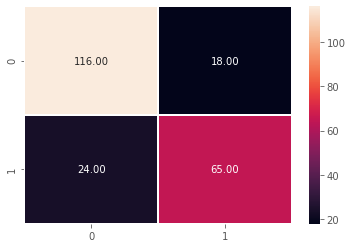

In [64]:
logreg(X, y)

Accuracy using DecisionTreeClassifier:  78.03
Confusion Matrix


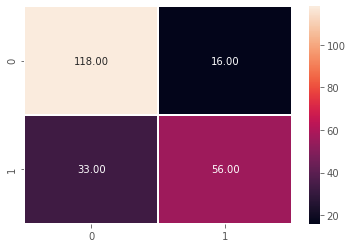

In [65]:
DesTre(X,y)

Accuracy using RandomForestClassifier:  80.72
Confusion Matrix


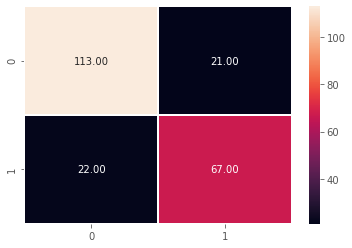

In [66]:
rfc(X, y)

Accuracy using SupportVectorClassifier:  78.48
Confusion Matrix


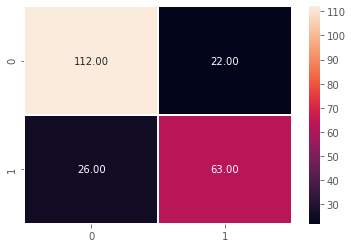

In [67]:
svm(X, y)

#### Hyperparameter Tunning - SupportVectorClassifier

In [68]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [71]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1)


In [72]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


<b> Applyting the best params to the model</b>

In [73]:
def svm(X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = SVC(C = 1, kernel = 'rbf', gamma = 0.1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    print('Accuracy using SupportVectorClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))
    print("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_val,y_pred),fmt='.2f', annot=True, linewidths=0.3,linecolor='white')

Accuracy using SupportVectorClassifier:  81.17
Confusion Matrix


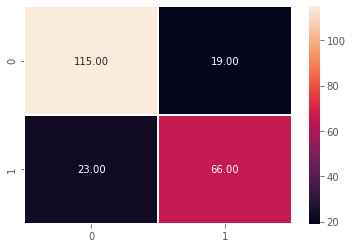

In [74]:
svm(X, y)

#### Hyperparameter Tunning - RandomForestClassifier

In [75]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}

In [76]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [79]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=2, min_samples_leaf=6,
                       min_samples_split=5, n_estimators=1150)

In [81]:
grid_search.best_score_

0.8278195488721805

<b> Applyting the best params to the model</b>

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)
rfc = RandomForestClassifier(max_depth=15, max_features=2, min_samples_leaf=6, min_samples_split=5, n_estimators=1150)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_val)
print('Accuracy using RandomForestClassifier: ', round(accuracy_score(y_val, y_pred)*100,2))

Accuracy using RandomForestClassifier:  81.72


<b> Prediction for X_test </b>

In [83]:
y_test = rfc.predict(X_test)

In [84]:
test['Survival_Pred'] = y_test

In [85]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival_Pred
0,3,1,0.589150,0,0,-0.281005,1,0
1,3,0,1.518382,1,0,-0.316176,2,0


In [91]:
submission = test[['Survival_Pred']]

In [93]:
submission.to_csv("submission.csv", index = False)